In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


In [3]:
# data_folder = r"E:\spot_volume"
data_folder = "C:/Users/YuweiCao/Documents/spot_volume_result" # 数据比较大 存在一个指定文件夹中

# 获取所有 CSV 文件
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# 用于存储每个交易所对应的 DataFrame
dfs_by_exchange = {}

# 遍历 CSV 文件
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    # 假设文件名格式为 "{market}_spot_volume_2000h.csv"
    market = file.split("_spot_volume_2000h.csv")[0]
    df = pd.read_csv(file_path)
    dfs_by_exchange[market] = df
    print(f"✅ 读取 {market} 数据成功，记录数：{len(df)}")


✅ 读取 binanceaggregate 数据成功，记录数：1002625
✅ 读取 binanceusa 数据成功，记录数：328207
✅ 读取 binance 数据成功，记录数：1002568
✅ 读取 bingx 数据成功，记录数：1704062
✅ 读取 bitfinex 数据成功，记录数：490852
✅ 读取 bitget 数据成功，记录数：1446788
✅ 读取 bitmex 数据成功，记录数：30000
✅ 读取 bitstamp 数据成功，记录数：228050
✅ 读取 bybit 数据成功，记录数：1085080
✅ 读取 coinbaseinternational 数据成功，记录数：4000
✅ 读取 coinbase 数据成功，记录数：617652
✅ 读取 gateio 数据成功，记录数：4411822
✅ 读取 gemini 数据成功，记录数：165383
✅ 读取 kraken 数据成功，记录数：725011
✅ 读取 kucoin 数据成功，记录数：1634340
✅ 读取 okex 数据成功，记录数：1100501
✅ 读取 upbit 数据成功，记录数：423050


In [4]:
# 目标币种
target_instrument = "BTC-USDT"

# 用于存储所有交易所的目标币种数据
all_exchanges_data = []

# 遍历每个交易所的数据
for market, df in dfs_by_exchange.items():
    df_filtered = df[df["instrument"] == target_instrument].copy()
    df_filtered["exchange"] = market
    all_exchanges_data.append(df_filtered)

combined_data = pd.concat(all_exchanges_data)

combined_data["time"] = pd.to_datetime(combined_data["time"])

print(f"✅ 合并数据成功，总记录数：{len(combined_data)}")

✅ 合并数据成功，总记录数：32000


每小时各交易所交易量：
exchange                binance  binanceaggregate  binanceusa      bingx  \
time                                                                       
2024-11-26 23:00:00  1313.35950           0.00000     0.00000   0.000000   
2024-11-27 00:00:00  1258.85709        1258.85709     1.94012  24.421724   
2024-11-27 01:00:00  1552.30509        1552.30509     0.78546  24.418168   
2024-11-27 02:00:00  1337.36368        1337.36368     1.12606  21.796600   
2024-11-27 03:00:00  1407.05432        1407.05432     0.19620  27.127530   

exchange              bitfinex  bitget  bitmex  bitstamp  bybit  coinbase  \
time                                                                        
2024-11-26 23:00:00   0.000000     0.0     0.0       0.0    0.0       0.0   
2024-11-27 00:00:00   0.000000     0.0     0.0       0.0    0.0       0.0   
2024-11-27 01:00:00  26.810895     0.0     0.0       0.0    0.0       0.0   
2024-11-27 02:00:00  32.008907     0.0     0.0       0.0    0.0       

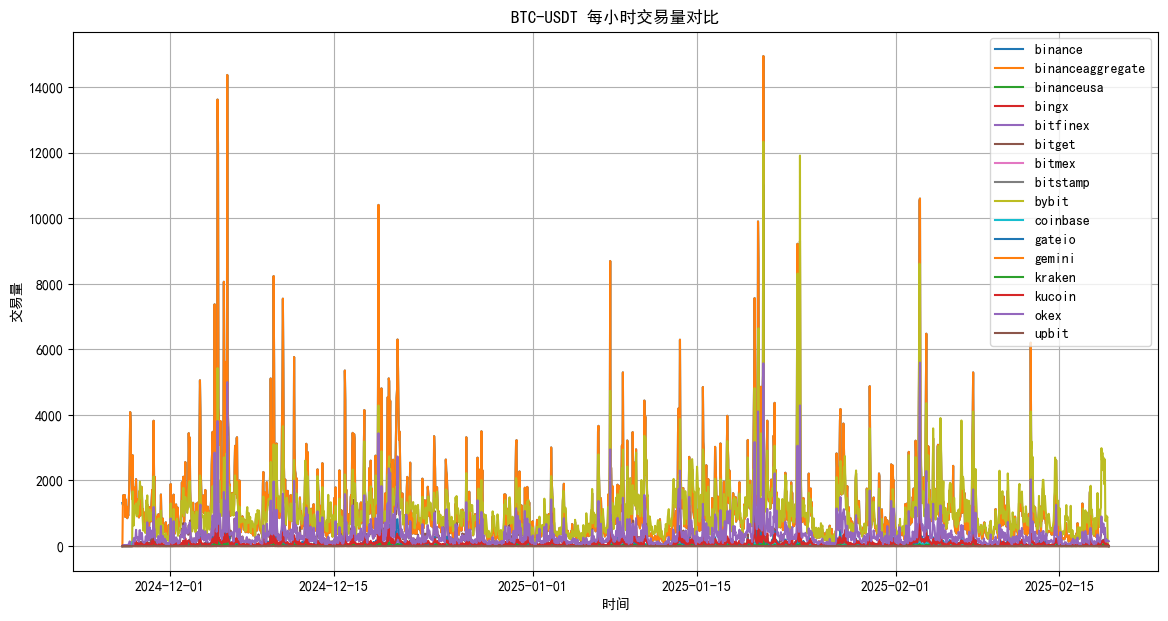

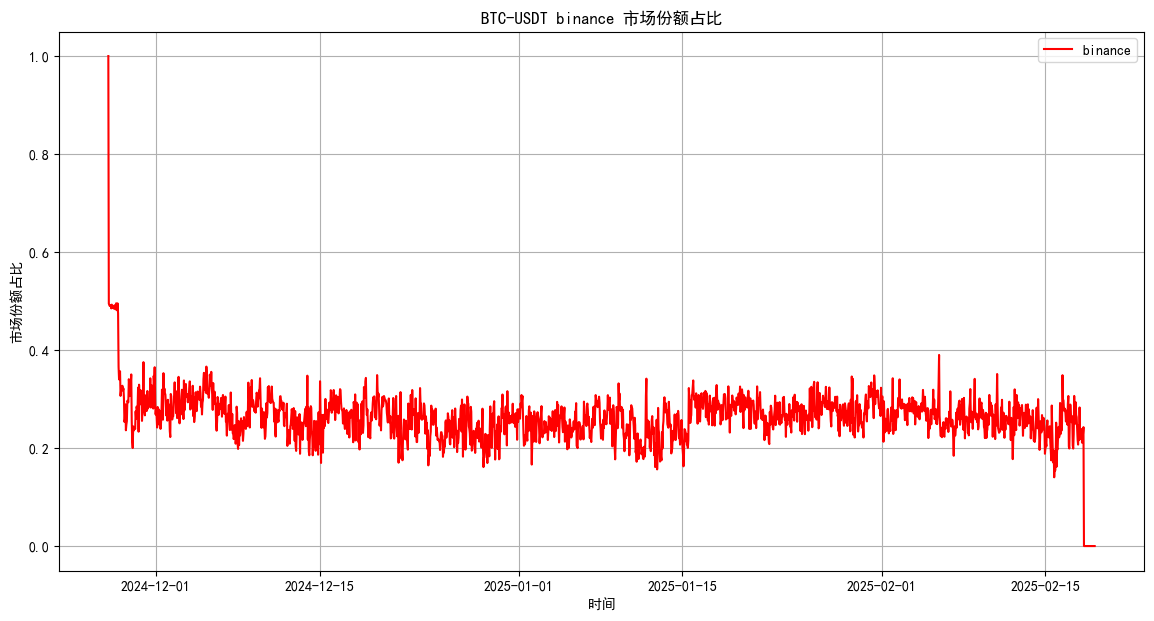

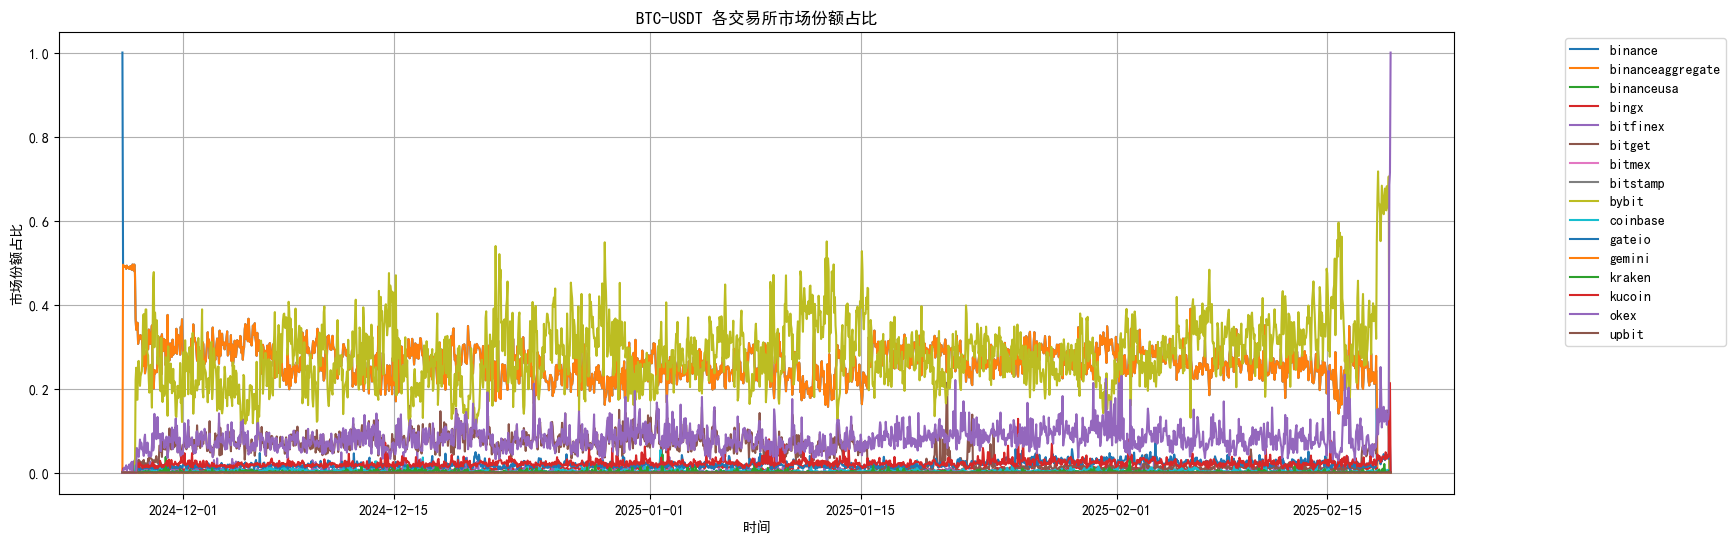

In [5]:
# 按小时和交易所分组，计算每小时交易量
hourly_volume = combined_data.groupby(["time", "exchange"])["volume"].sum().unstack()

# 计算全市场每小时总交易量
hourly_volume["total_market_volume"] = hourly_volume.sum(axis=1)
# 如果某小时没有交易量数据，NaN填充为 0
hourly_volume = hourly_volume.fillna(0)

# 计算占比
hourly_volume_share = hourly_volume.div(hourly_volume["total_market_volume"], axis=0)

print("每小时各交易所交易量：")
print(hourly_volume.head())

print("\n每小时各交易所市场份额占比：")
print(hourly_volume_share.head())

# 可视化：各交易所每小时交易量
plt.figure(figsize=(14, 7))
for exchange in hourly_volume.columns[:-1]:  # 排除 total_market_volume
    plt.plot(hourly_volume.index, hourly_volume[exchange], label=exchange)
plt.title(f"{target_instrument} 每小时交易量对比")
plt.xlabel("时间")
plt.ylabel("交易量")
plt.legend()
plt.grid()
plt.show()

# 可视化：目标交易所市场份额占比
target_exchange = "binance"
if target_exchange in hourly_volume_share.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(hourly_volume_share.index, hourly_volume_share[target_exchange], label=target_exchange, color="red")
    plt.title(f"{target_instrument} {target_exchange} 市场份额占比")
    plt.xlabel("时间")
    plt.ylabel("市场份额占比")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print(f"⚠️ 目标交易所 {target_exchange} 不在数据中！")
    

# # 遍历所有交易所
# for exchange in hourly_volume_share.columns:
#     if exchange != "total_market_volume":  # 排除总交易量列
#         plt.figure(figsize=(14, 7))
#         plt.plot(hourly_volume_share.index, hourly_volume_share[exchange], label=exchange, color="red")
#         plt.title(f"{target_instrument} {exchange} 市场份额占比")
#         plt.xlabel("时间")
#         plt.ylabel("市场份额占比")
#         plt.ylim(0, 1)
#         plt.legend()
#         plt.grid()
#         plt.show()

plt.figure(figsize=(18, 6))

# 遍历所有交易所并绘制曲线
for exchange in hourly_volume_share.columns:
    if exchange != "total_market_volume":
        plt.plot(hourly_volume_share.index, hourly_volume_share[exchange], label=exchange)

plt.title(f"{target_instrument} 各交易所市场份额占比")
plt.xlabel("时间")
plt.ylabel("市场份额占比")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid()
plt.show()


每小时各交易所交易量环比增长率：
exchange              binance  binanceaggregate  binanceusa     bingx  \
time                                                                    
2024-11-26 23:00:00       NaN               NaN         NaN       NaN   
2024-11-27 00:00:00 -0.041498               inf         inf       inf   
2024-11-27 01:00:00  0.233107          0.233107   -0.595149 -0.000146   
2024-11-27 02:00:00 -0.138466         -0.138466    0.433631 -0.107361   
2024-11-27 03:00:00  0.052110          0.052110   -0.825764  0.244576   

exchange             bitfinex  bitget  bitmex  bitstamp  bybit  coinbase  \
time                                                                       
2024-11-26 23:00:00       NaN     NaN     NaN       NaN    NaN       NaN   
2024-11-27 00:00:00       NaN     NaN     NaN       NaN    NaN       NaN   
2024-11-27 01:00:00       inf     NaN     NaN       NaN    NaN       NaN   
2024-11-27 02:00:00  0.193877     NaN     NaN       NaN    NaN       NaN   
2024-11-27 03:0

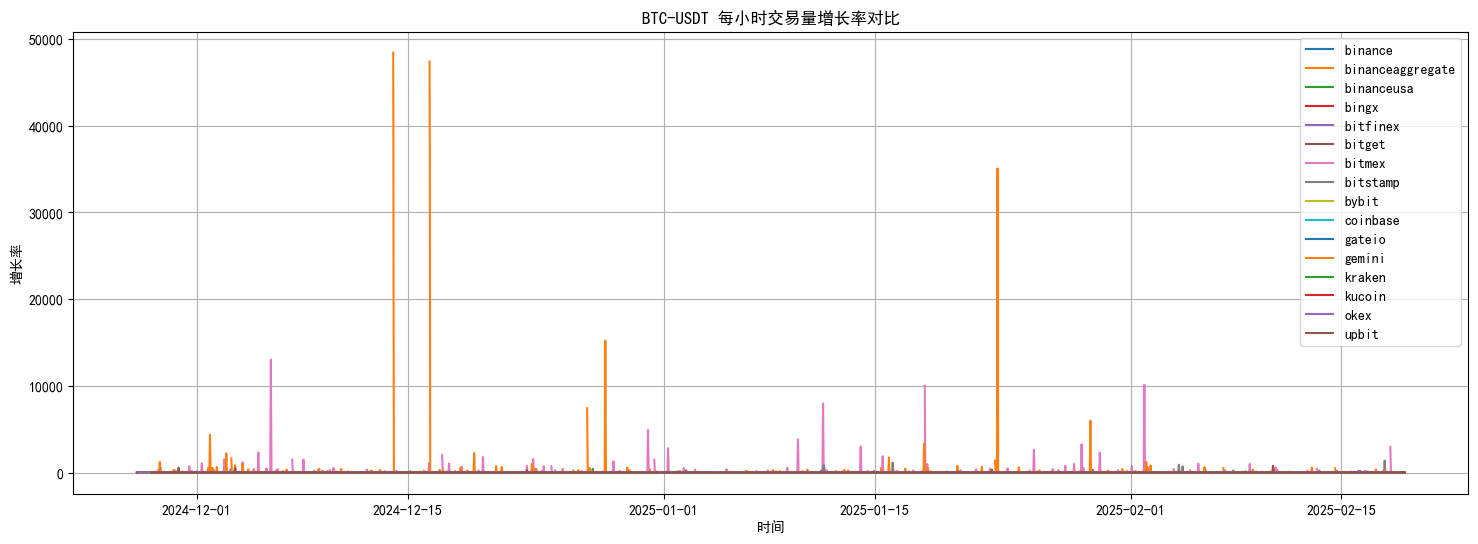

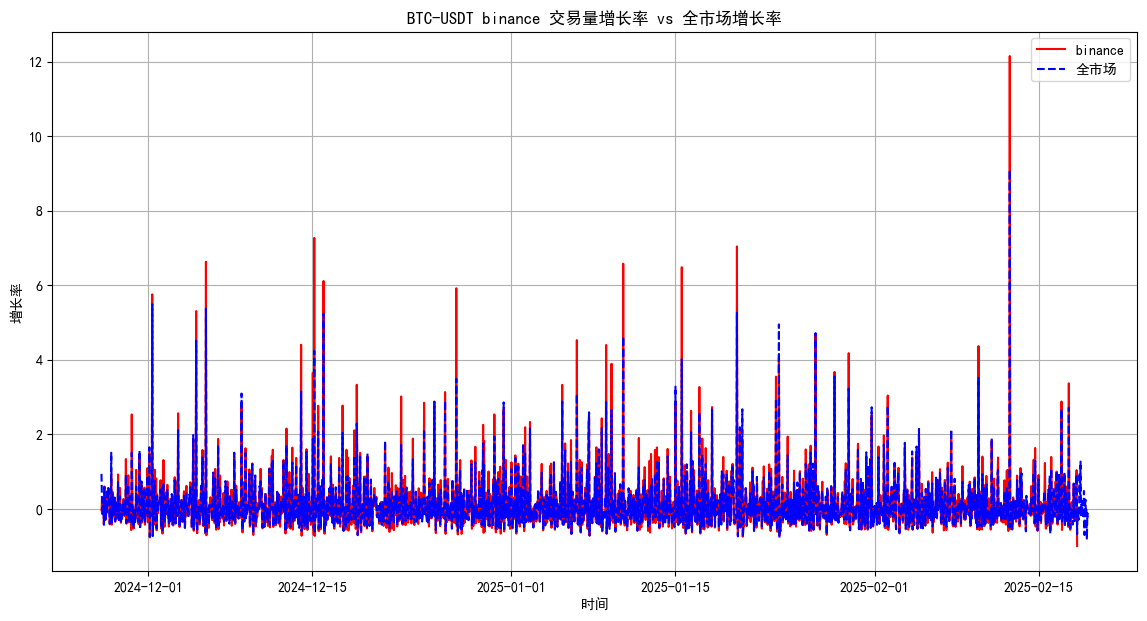

In [6]:
# 计算每个交易所每小时交易量相对于前一小时的变化比例
hourly_volume_growth = hourly_volume.pct_change(fill_method=None)

print("每小时各交易所交易量环比增长率：")
print(hourly_volume_growth.head())

# 可视化：各交易所每小时交易量增长率
plt.figure(figsize=(18, 6))
for exchange in hourly_volume_growth.columns[:-1]:  # 排除 total_market_volume
    plt.plot(hourly_volume_growth.index, hourly_volume_growth[exchange], label=exchange)
plt.title(f"{target_instrument} 每小时交易量增长率对比")
plt.xlabel("时间")
plt.ylabel("增长率")
plt.legend()
plt.grid()
plt.show()

target_exchange = "binance"
# 可视化：目标交易所增长率 vs 全市场增长率
if target_exchange in hourly_volume_growth.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(hourly_volume_growth.index, hourly_volume_growth[target_exchange], label=target_exchange, color="red")
    plt.plot(hourly_volume_growth.index, hourly_volume_growth["total_market_volume"], label="全市场", color="blue", linestyle="--")
    plt.title(f"{target_instrument} {target_exchange} 交易量增长率 vs 全市场增长率")
    plt.xlabel("时间")
    plt.ylabel("增长率")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print(f"⚠️ 目标交易所 {target_exchange} 不在数据中！")

# for exchange in hourly_volume_growth.columns:
#     if exchange != "total_market_volume":  # 排除总交易量列
#         plt.figure(figsize=(14, 7))
#         plt.plot(hourly_volume_growth.index, hourly_volume_growth[exchange], label=exchange, color="red")
#         plt.plot(hourly_volume_growth.index, hourly_volume_growth["total_market_volume"], label="全市场", color="blue", linestyle="--")
#         plt.title(f"{target_instrument} {exchange} 交易量增长率 vs 全市场增长率")
#         plt.xlabel("时间")
#         plt.ylabel("增长率")
#         plt.legend()
#         plt.grid()
#         plt.show()

exchange             bitmex  rolling_mean  rolling_std  is_abnormal
time                                                               
2024-11-27 19:00:00  0.0694      0.003305     0.015144         True
2024-11-27 20:00:00  0.0925      0.007359     0.024084         True
2024-11-28 05:00:00  0.2217      0.020883     0.049867         True
2024-11-28 14:00:00  4.7764      0.226379     0.970406         True
2024-12-01 17:00:00  0.3520      0.057450     0.084976         True
...                     ...           ...          ...          ...
2025-02-14 17:00:00  0.8927      0.053354     0.186603         True
2025-02-16 14:00:00  0.2001      0.015096     0.044702         True
2025-02-16 15:00:00  0.5684      0.038742     0.121313         True
2025-02-18 01:00:00  0.4029      0.031579     0.085847         True
2025-02-18 06:00:00  0.5891      0.056117     0.142172         True

[94 rows x 4 columns]


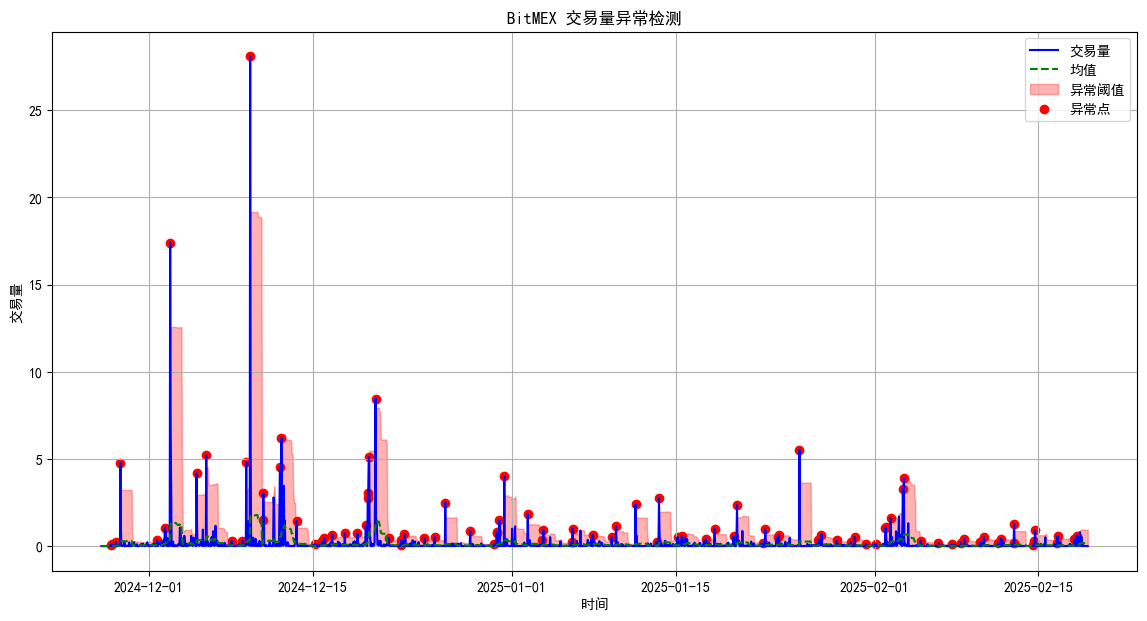

In [7]:
bitmex_data = hourly_volume[["bitmex"]].copy()

# 确保时间索引正确排序
bitmex_data = bitmex_data.sort_index()

# 计算过去 24 小时的交易量均值和标准差
bitmex_data["rolling_mean"] = bitmex_data["bitmex"].rolling(window=24, min_periods=1).mean()
bitmex_data["rolling_std"] = bitmex_data["bitmex"].rolling(window=24, min_periods=1).std()

# 识别异常交易量（大于均值 + 3 倍标准差）
bitmex_data["is_abnormal"] = bitmex_data["bitmex"] > (bitmex_data["rolling_mean"] + 3 * bitmex_data["rolling_std"])

abnormal_trades = bitmex_data[bitmex_data["is_abnormal"]]
print(abnormal_trades)

plt.figure(figsize=(14, 7))
plt.plot(bitmex_data.index, bitmex_data["bitmex"], label="交易量", color="blue")
plt.plot(bitmex_data.index, bitmex_data["rolling_mean"], label="均值", color="green", linestyle="--")
plt.fill_between(bitmex_data.index, bitmex_data["rolling_mean"] +3 * bitmex_data["rolling_std"], alpha=0.3, color="red", label="异常阈值")
plt.scatter(bitmex_data[bitmex_data["is_abnormal"]].index, bitmex_data[bitmex_data["is_abnormal"]]["bitmex"], color="red", label="异常点")

plt.title("BitMEX 交易量异常检测")
plt.xlabel("时间")
plt.ylabel("交易量")
plt.legend()
plt.grid()
plt.show()